# 鐵達尼號生存者預測_演算法預測
---
## 1. 準備 Preparing
### 1.1. 載入模組 Module Loading
 - seaborn 是基於 matlotlib 的數據圖像化套件
 - re 在這裡負責將字串做重新編一分類
 - sklearn 為本次使用的演算法模組庫 
   * accuracy_score 用於評估準確度
   * train_test_split 用於將訓練資料整理成 sklearn 的通用格式

In [1]:
print("-"*60+"\n ### Modules import")
print("import numpy, pandas, matplotlib.pyplot as plt, seaborn, re")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import seaborn as sns # the integrated matplotlib photo
import re # do str recompile
print("import sklearn widget")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
print("import json, time, threading, queue, sys, warnings")
import json, time, datetime
import threading, queue
import sys, warnings
print("Module loading completed...")

------------------------------------------------------------
 ### Modules import
import numpy, pandas, matplotlib.pyplot as plt, seaborn, re
import sklearn widget
import json, time, threading, queue, sys, warnings
Module loading completed...


---
### 1.2. 載入和查看資料 Data Loading and Checking

In [2]:
print("-"*60+"\n ### Data Loading and Checking")
print("\nload 'Titanic_train.csv' the train data. \n")
train = pd.read_csv("train.csv", index_col = 'PassengerId')
train.info()
# print("\n"+"-"*30+"\nmake 'train' but only numbers keep \n")
# trainPureNum = train.select_dtypes(include=['float64','int64'])
# trainPureNum.info()
print("\n"+"-"*30+"\nload 'Titanic_test.csv' the test data. \n")
test = pd.read_csv("test.csv", index_col = 'PassengerId')

answer = pd.read_csv("gender_submission.csv", index_col = 'PassengerId')

test.info()
# print("\n"+"-"*30+"\nmake 'test' but only numbers keep \n")
# testPureNum = test.select_dtypes(include=['float64','int64','object'])
# testPureNum.info()

train.iloc[1]

------------------------------------------------------------
 ### Data Loading and Checking

load 'Titanic_train.csv' the train data. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB

------------------------------
load 'Titanic_test.csv' the test data. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Col

Survived                                                    1
Pclass                                                      1
Name        Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                    female
Age                                                      38.0
SibSp                                                       1
Parch                                                       0
Ticket                                               PC 17599
Fare                                                  71.2833
Cabin                                                     C85
Embarked                                                    C
Name: 2, dtype: object

In [52]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


---
## 2. 資料數值化 Data Numeralization
### 2.1. 空欄位填滿 Null Table Filling
 - 訓練資料和測試資料上存在缺漏需要填補

#### 2.1.1. 查看資料缺漏 Checking Data Loss
 - 可以得知在Age年齡、Cabin船艙房號、Embarked登船港口上有缺漏
 

In [3]:
print("-"*60+"\n ### Null Table Filling")
print("\ncheck data loss of 'train'. \n")
print(train.isnull().sum())
print("\ncheck data loss of 'test'. \n")
print(test.isnull().sum())

------------------------------------------------------------
 ### Null Table Filling

check data loss of 'train'. 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

check data loss of 'test'. 

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


---
#### 2.1.2. 填補房號資料 Filling Carbin
 - 先查看Carbin房號是否和Pclass船票等級是否有相關性
    - 房號的號碼是1位英文字母+2位或3位數字
 - 我們先用未缺漏的資料查看相關性，確定它是可以使用的資料，再做填補

In [4]:
print("\n"+"-"*30+"\nFilling Carbin Num.")
checkSetTrain1 = train[['Cabin', 'Pclass', 'Survived']].copy()
checkSetTest1 = test[['Cabin', 'Pclass']].copy()

[ ( checkSetTrain1.drop(i, inplace=True) if checkSetTrain1.loc[i].isnull().sum() else None) for i in range(1,892) ]
[ ( checkSetTest1.drop(i, inplace=True) if checkSetTest1.loc[i].isnull().sum() else None) for i in range(892,1310) ]
# .drop(i, inplace=True) is same affect as pop

for i in [ 'Deck_'+i for i in train['Cabin'].map(
        lambda x: re.compile("([a-zA-Z]+)").search(x).group() if type(x)==str else None
    ).value_counts().index if i ]+['RoomNumber']:
    checkSetTrain1[i] = 0
    checkSetTest1[i] = 0
    
for i in checkSetTrain1.index:
    tgt = checkSetTrain1.loc[i, 'Cabin']
    if type(tgt)!= str:
        continue
    else:
        checkSetTrain1.loc[i, 'Deck_'+re.compile("([a-zA-Z]+)").search(tgt).group()] = 1
        roomNum = re.compile("([0-9]+)").search(tgt)
        if roomNum:
            checkSetTrain1.loc[i, 'RoomNumber'] = roomNum.group()

for i in checkSetTest1.index:
    tgt = checkSetTest1.loc[i, 'Cabin']
    if type(tgt)!= str:
        continue
    else:
        checkSetTest1.loc[i, 'Deck_'+re.compile("([a-zA-Z]+)").search(tgt).group()] = 1
        roomNum = re.compile("([0-9]+)").search(tgt)
        if roomNum:
            checkSetTest1.loc[i, 'RoomNumber'] = roomNum.group()

[ checkSetTrain1.pop(i) for i in ['Cabin', 'RoomNumber'] ]
checkSetTrain1


------------------------------
Filling Carbin Num.


,Pclass,Survived,Deck_C,Deck_B,Deck_D,Deck_E,Deck_A,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,
2,1,1,1,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0
7,1,0,0,0,0,1,0,0,0,0
11,3,1,0,0,0,0,0,0,1,0
12,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
872,1,1,0,0,1,0,0,0,0,0
873,1,0,0,1,0,0,0,0,0,0
880,1,1,1,0,0,0,0,0,0,0


In [5]:
[ checkSetTest1.pop(i) for i in ['Cabin', 'RoomNumber'] ]
checkSetTest1

,Pclass,Deck_C,Deck_B,Deck_D,Deck_E,Deck_A,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,
904,1,0,1,0,0,0,0,0,0
906,1,0,0,0,1,0,0,0,0
916,1,0,1,0,0,0,0,0,0
918,1,0,1,0,0,0,0,0,0
920,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
1296,1,0,0,1,0,0,0,0,0
1297,2,0,0,1,0,0,0,0,0
1299,1,1,0,0,0,0,0,0,0


<AxesSubplot:>

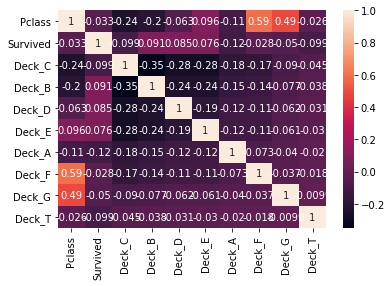

In [6]:
sns.heatmap(checkSetTrain1.corr(), annot = True)

        由此可見，艙等只和F, G房號有關, 但艙等、房號都和生存可能無關，所以可以考慮放棄使用。

---
#### 2.1.3. 填補年齡資料 Filling Age
   - 有關一個鐵達尼號倖存者的知識，當年船上的乘客會將救生船優先讓給婦女及小孩，所以年齡資料可能會是重要依據。
   - 先查看未缺陷資料的狀況。


------------------------------
Filling Age
Show current data status of age


Text(0.5, 1.0, 'Age')

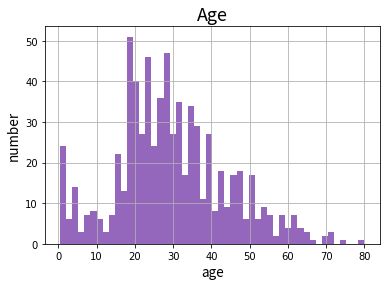

In [7]:
print("\n"+"-"*30+"\nFilling Age")
print("Show current data status of age")

train['Age'].hist(bins=50, color='tab:purple')
plt.xlabel("age", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':15})
plt.ylabel("number", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':15})
plt.title("Age", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':20})

##### 直接使用純數字年齡來看相關性
 - 有事先篩掉缺失的部分來確認。

<AxesSubplot:>

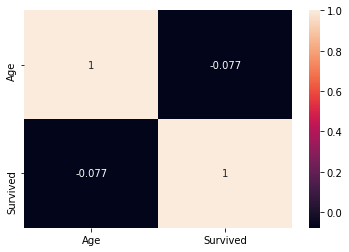

In [8]:
checkSetTrain21 = train[['Age', 'Survived']].copy()
[ ( checkSetTrain21.drop(i, inplace=True) if checkSetTrain21.loc[i].isnull().sum() else None) 
 for i in train.index ]


sns.heatmap(checkSetTrain21.corr(), annot = True)

##### 將年齡分級來看相關性
 - 顯然直接使用數字年齡不合適，所以將年齡數字分級簡化數值再看一遍。
    - 用純粹每10歲分級、和用未成年和成年分級看看

<AxesSubplot:>

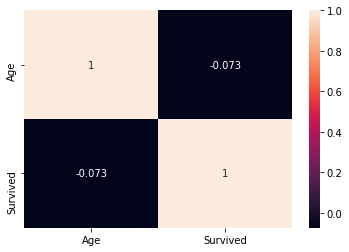

In [9]:
checkSetTrain22 = train[['Age', 'Survived']].copy()
[ ( checkSetTrain22.drop(i, inplace=True) if checkSetTrain22.loc[i].isnull().sum() else None) 
 for i in train.index ]
for i in checkSetTrain22.index:
    checkSetTrain22.loc[i,'Age'] = int(checkSetTrain22.loc[i,'Age']/10)

sns.heatmap(checkSetTrain22.corr(), annot = True)

<AxesSubplot:>

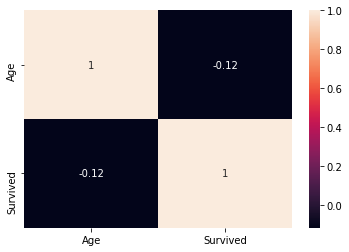

In [10]:
checkSetTrain23 = train[['Age', 'Survived']].copy()
[ ( checkSetTrain23.drop(i, inplace=True) if checkSetTrain23.loc[i].isnull().sum() else None) 
 for i in train.index ]
for i in checkSetTrain22.index:
    checkSetTrain23.loc[i,'Age'] = (0 if checkSetTrain23.loc[i,'Age']<18 else 1)

sns.heatmap(checkSetTrain23.corr(), annot = True)

  - 因此我們在這邊不選擇年齡資料
  ---

#### 2.1.4. 填補票價資料 Filling Fare
 - 票價資料有漏一個.........，直接劃記為0
 - 嘗試對票價做分級

<AxesSubplot:>

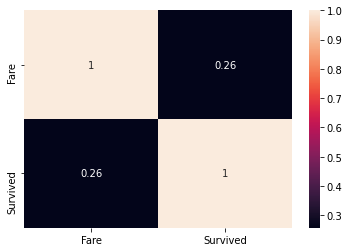

In [11]:
checkSetTrain3 = train[['Fare', 'Survived']].copy()
checkSetTrain3['Fare'] = checkSetTrain3['Fare'].fillna(0)
sns.heatmap(checkSetTrain3.corr(), annot = True)

<Figure size 2400x1600 with 0 Axes>

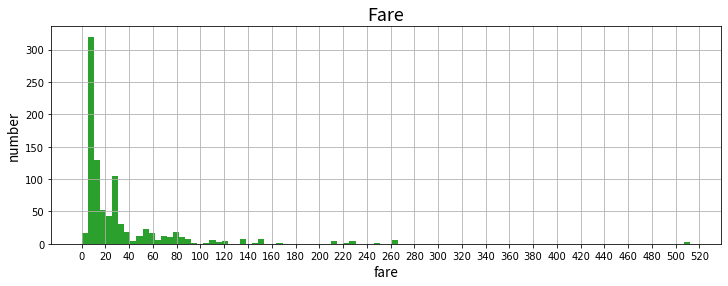

<Figure size 2400x1600 with 0 Axes>

In [12]:
train['Fare'].hist(bins=100, color='tab:green', figsize=(12,4))
plt.xlabel("fare", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':15})
plt.ylabel("number", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':15})
plt.title("Fare", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':20})
plt.xticks(np.linspace(0, 520, 27))
plt.figure(dpi=400)

Text(0.5, 1.0, 'Fare')

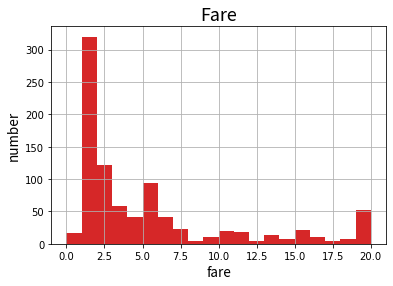

In [13]:
checkSetTrain3 = train[['Fare', 'Survived']].copy()
checkSetTrain3['Fare'] = checkSetTrain3['Fare'].fillna(0)

checkSetTrain3['Fare'] = checkSetTrain3['Fare'].map(lambda x: int(x/5) if int(x/5)<20 else 20 ) 

checkSetTrain3['Fare'].hist(bins=20, color='tab:red',figsize=(6,4))
plt.xlabel("fare", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':15})
plt.ylabel("number", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':15})
plt.title("Fare", fontdict={'family':'Source Sans Pro', 'color':'black', 'weight':'regular', 'size':20})

    整理過的資料狀況稍好一點

<AxesSubplot:>

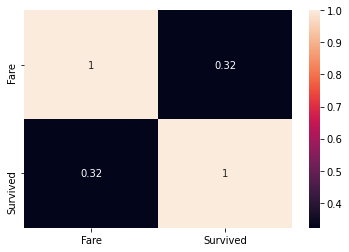

In [14]:
sns.heatmap(checkSetTrain3.corr(), annot = True)

   - 那在這裡我們準備好對應的訓練集

In [15]:
checkSetTest3 = test[['Fare']].copy()
checkSetTest3['Fare'] = checkSetTest3['Fare'].fillna(0)
checkSetTest3['Fare'] = checkSetTest3['Fare'].map(lambda x: int(x/5) if int(x/5)<20 else 20 ) 
checkSetTest3

,Fare
PassengerId,
892,1
893,1
894,1
895,1
896,2
...,...
1305,1
1306,20
1307,1


---
### 2.2. 資料數值化 Data Numeralization 
#### 2.2.1. 性別 Sex、直系親屬(父母子女)人數 Parch、同輩親屬及配偶數量 SibSp

<AxesSubplot:>

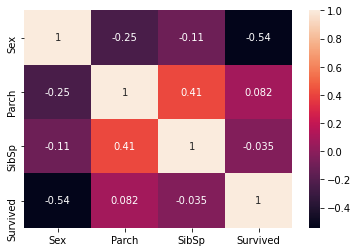

In [16]:
checkSetTrain4 = train[['Sex', 'Parch', 'SibSp', 'Survived']].copy()
checkSetTrain4['Sex'] = checkSetTrain4['Sex'].map({'male': 1, 'female': 0})
sns.heatmap(checkSetTrain4.corr(), annot = True)

In [17]:
checkSetTest4 = test[['Sex', 'Parch', 'SibSp']].copy()
checkSetTest4['Sex'] = checkSetTest4['Sex'].map({'male': 1, 'female': 0})
checkSetTest4

,Sex,Parch,SibSp
PassengerId,,,
892,1,0,0
893,0,0,1
894,1,0,0
895,1,0,0
896,0,1,1
...,...,...,...
1305,1,0,0
1306,0,0,0
1307,1,0,0


---
#### 2.2.2. 船票編號 Ticket

In [18]:
checkSetTrain5 = train[['Ticket', 'Survived']].copy()
[ [ checkSetTrain5.loc[i, 'Ticket'], re.compile("([0-9]+)").search(checkSetTrain5.loc[i, 'Ticket']) ] for i in checkSetTrain5.index ]
pd.Series([ re.compile("([0-9]+)").search(checkSetTrain5.loc[i, 'Ticket']) for i in checkSetTrain5.index ]).unique()

array([<re.Match object; span=(2, 3), match='5'>,
       <re.Match object; span=(3, 8), match='17599'>,
       <re.Match object; span=(6, 7), match='2'>,
       <re.Match object; span=(0, 6), match='113803'>,
       <re.Match object; span=(0, 6), match='373450'>,
       <re.Match object; span=(0, 6), match='330877'>,
       <re.Match object; span=(0, 5), match='17463'>,
       <re.Match object; span=(0, 6), match='349909'>,
       <re.Match object; span=(0, 6), match='347742'>,
       <re.Match object; span=(0, 6), match='237736'>,
       <re.Match object; span=(3, 7), match='9549'>,
       <re.Match object; span=(0, 6), match='113783'>,
       <re.Match object; span=(2, 3), match='5'>,
       <re.Match object; span=(0, 6), match='347082'>,
       <re.Match object; span=(0, 6), match='350406'>,
       <re.Match object; span=(0, 6), match='248706'>,
       <re.Match object; span=(0, 6), match='382652'>,
       <re.Match object; span=(0, 6), match='244373'>,
       <re.Match object; span

In [19]:
def ticketType(num):
    if num<10:
        return 1
    elif num<1000:
        return 2 
    elif num<2000:
        return 3 
    elif num<3000:
        return 4 
    elif num<10000:
        return 5
    elif num<20000:
        return 6
    elif num<30000:
        return 7
    elif num<100000:
        return 8
    elif num<200000:
        return 9
    elif num<300000:
        return 10
    elif num<1000000:
        return 11
    else:
        return 12
checkSetTrain5['ticketType'] = pd.Series([0] + [ ticketType(int(tgt.group())) if tgt else 0 for tgt in [ re.compile("([0-9]+)").search(checkSetTrain5.loc[i, 'Ticket']) for i in checkSetTrain5.index ] ])
checkSetTrain5

,Ticket,Survived,ticketType
PassengerId,,,
1,A/5 21171,0,1
2,PC 17599,1,6
3,STON/O2. 3101282,1,1
4,113803,1,9
5,373450,0,11
...,...,...,...
887,211536,0,10
888,112053,1,9
889,W./C. 6607,0,5


<AxesSubplot:>

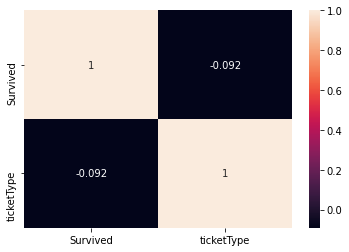

In [20]:
sns.heatmap(checkSetTrain5.corr(), annot = True)

   - 那在這裡我們準備好對應的訓練集

In [21]:
checkSetTest5 = test[['Ticket']].copy()
[ [ checkSetTest5.loc[i, 'Ticket'], re.compile("([0-9]+)").search(checkSetTest5.loc[i, 'Ticket']) ] for i in checkSetTest5.index ]
# temp5 = pd.DataFrame(index = np.arange(891, 1309) + [ ticketType(int(tgt.group())) if tgt else 0 for tgt in [ re.compile("([0-9]+)").search(checkSetTest5.loc[i, 'Ticket']) for i in checkSetTest5.index ] ])

temp5 = pd.DataFrame(
    [ (ticketType(int(tgt.group())) if tgt else 0) 
     for tgt in [ 
         re.compile("([0-9]+)").search(checkSetTest5.loc[i, 'Ticket']) 
         for i in checkSetTest5.index ] ])
temp5.index = np.arange(892, 1310)
checkSetTest5['ticketType'] = temp5
checkSetTest5

,Ticket,ticketType
PassengerId,,
892,330911,11
893,363272,11
894,240276,10
895,315154,11
896,3101298,12
...,...,...
1305,A.5. 3236,1
1306,PC 17758,6
1307,SOTON/O.Q. 3101262,12


    就現在可用的分類方式，似乎無法很好使用船票資料

---
#### 2.2.3. 登船處 Embarked

<AxesSubplot:>

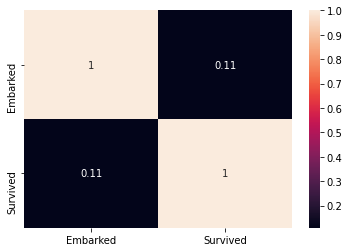

In [22]:
checkSetTrain6 = train[['Embarked', 'Survived']].copy()
checkSetTrain6['Embarked'] = checkSetTrain6['Embarked'].map({"S": 0, "C": 1, "Q": 2})
sns.heatmap(checkSetTrain6[['Embarked', 'Survived']].corr(), annot = True)

<AxesSubplot:>

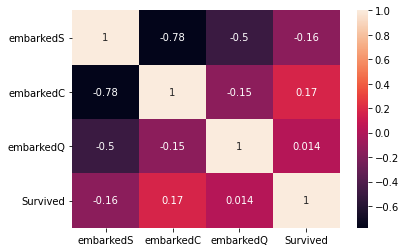

In [23]:
for i in ["S", "C", "Q"]:
    checkSetTrain6['embarked'+i] = 0
    
for i in checkSetTrain6.index:
    embarked = checkSetTrain6.loc[i, 'Embarked']
    if embarked == 0:
        checkSetTrain6.loc[i, 'embarkedS'] = 1
    elif embarked == 1:
        checkSetTrain6.loc[i, 'embarkedC'] = 1
    else:
        checkSetTrain6.loc[i, 'embarkedQ'] = 1 
        
sns.heatmap(checkSetTrain6[['embarkedS', 'embarkedC', 'embarkedQ', 'Survived']].corr(), annot = True)

   - 那在這裡我們準備好對應的訓練集

In [24]:
checkSetTest6 = test[['Embarked']].copy()
checkSetTest6['Embarked'] = checkSetTest6['Embarked'].map({"S": 0, "C": 1, "Q": 2})

for i in ["S", "C", "Q"]:
    checkSetTest6['embarked'+i] = 0
    
for i in checkSetTest6.index:
    embarked = checkSetTest6.loc[i, 'Embarked']
    if embarked == 0:
        checkSetTest6.loc[i, 'embarkedS'] = 1
    elif embarked == 1:
        checkSetTest6.loc[i, 'embarkedC'] = 1
    else:
        checkSetTest6.loc[i, 'embarkedQ'] = 1 
checkSetTest6

,Embarked,embarkedS,embarkedC,embarkedQ
PassengerId,,,,
892,2,0,0,1
893,0,1,0,0
894,2,0,0,1
895,0,1,0,0
896,0,1,0,0
...,...,...,...,...
1305,0,1,0,0
1306,1,0,1,0
1307,0,1,0,0


---
#### 2.2.4. 姓名 Name 
 - 死亡flag分類
   - 一定死的：'Capt.', 'Don.', 'Jonkheer.', 'Rev.'
   - 倖存機率低的：'Mr.', 'Dr.'
   - 倖存機率高的：'Col.', 'Major.', 'Master.', 'Miss.', 'Mrs.'
   - 一定活的：'Countess.', 'Lady.', 'Mlle.', 'Mme.', 'Ms.', 'Sir.'

In [25]:
checkSetTrain7 = train[['Name', 'Survived']].copy()
checkSetTrain7['Title'] = checkSetTrain7['Name'].map(lambda x: re.compile("([A-Za-z]+)\.").search(x).group())
checkSetTrain7[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt.,0.000000
1,Col.,0.500000
2,Countess.,1.000000
3,Don.,0.000000
4,Dr.,0.428571
5,Jonkheer.,0.000000
6,Lady.,1.000000
7,Major.,0.500000
8,Master.,0.575000
9,Miss.,0.697802


In [26]:
checkSetTrain7['Title'] = checkSetTrain7['Title'].map({
    'Capt.': 0, 'Don.': 0, 'Jonkheer.': 0, 'Rev.': 0,
    'Mr.': 1, 'Dr.': 1,
    'Col.': 2, 'Major.': 2, 'Master.': 2, 'Miss.': 2, 'Mrs.': 2,
    'Countess.': 3, 'Lady.': 3, 'Mlle.': 3, 'Mme.': 3, 'Ms.': 3, 'Sir.': 3
})
checkSetTrain7[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.000000
1,1,0.160305
2,2,0.715100
3,3,1.000000


<AxesSubplot:>

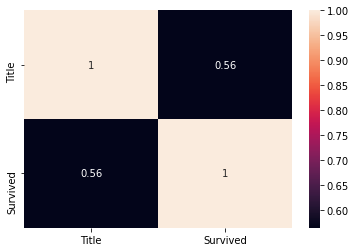

In [27]:
sns.heatmap(checkSetTrain7[['Title', 'Survived']].corr(), annot = True)

   - 那在這裡我們準備好對應的訓練集

In [28]:
checkSetTest7 = test[['Name']].copy()
checkSetTest7['Title'] = checkSetTest7['Name'].map(lambda x: re.compile("([A-Za-z]+)\.").search(x).group())
checkSetTest7['Title'] = checkSetTest7['Title'].map({
    'Capt.': 0, 'Don.': 0, 'Jonkheer.': 0, 'Rev.': 0,
    'Mr.': 1, 'Dr.': 1,
    'Col.': 2, 'Major.': 2, 'Master.': 2, 'Miss.': 2, 'Mrs.': 2,
    'Countess.': 3, 'Lady.': 3, 'Mlle.': 3, 'Mme.': 3, 'Ms.': 3, 'Sir.': 3
})
print(checkSetTest7.isnull().sum())
checkSetTest7['Title'] = checkSetTest7['Title'].fillna(5)
print(checkSetTest7.isnull().sum())
checkSetTest7

Name     0
Title    1
dtype: int64
Name     0
Title    0
dtype: int64


,Name,Title
PassengerId,,
892,"Kelly, Mr. James",1.0
893,"Wilkes, Mrs. James (Ellen Needs)",2.0
894,"Myles, Mr. Thomas Francis",1.0
895,"Wirz, Mr. Albert",1.0
896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2.0
...,...,...
1305,"Spector, Mr. Woolf",1.0
1306,"Oliva y Ocana, Dona. Fermina",5.0
1307,"Saether, Mr. Simon Sivertsen",1.0


---
### 2.3. 選擇資料 Data Chosing 

 - "填補房號資料 Filling Carbin"
        sns.heatmap(checkSetTrain1.corr(), annot = True)
        'Cabin', 'Pclass', 'Deck_C', 'Deck_B', 'Deck_D', 'Deck_E', 'Deck_A', 'Deck_F', 'Deck_G', 'Deck_T'
        
 - "填補年齡資料 Filling Age"
        sns.heatmap(checkSetTrain21.corr(), annot = True)
        'Age'
        sns.heatmap(checkSetTrain22.corr(), annot = True)
        'Age'
        sns.heatmap(checkSetTrain23.corr(), annot = True)
        'Age'
        
 - "填補票價資料 Filling Fare"
        sns.heatmap(checkSetTrain3.corr(), annot = True)
        'Fare'
        
 - "性別 Sex、直系親屬(父母子女)人數 Parch、同輩親屬及配偶數量 SibSp"
        sns.heatmap(checkSetTrain4.corr(), annot = True)
        'Sex', 'Parch', 'SibSp'
        
 - "船票編號 Ticket"
        sns.heatmap(checkSetTrain5.corr(), annot = True)
        'ticketType'
        
 - "登船處 Embarked"
        sns.heatmap(checkSetTrain6[['Embarked', 'Survived']].corr(), annot = True)
        sns.heatmap(checkSetTrain6[['embarkedS', 'embarkedC', 'embarkedQ', 'Survived']].corr(), annot = True)
        'Embarked', 'embarkedS', 'embarkedC', 'embarkedQ'
        
 - "姓名 Name"
        sns.heatmap(checkSetTrain7[['Title', 'Survived']].corr(), annot = True)
        'Title'

In [29]:
TrainSet1 = pd.concat([
    checkSetTrain3[['Fare']],
    checkSetTrain4[['Sex', 'Parch', 'SibSp']],
    checkSetTrain5[['ticketType']],
    checkSetTrain6[['embarkedS', 'embarkedC', 'embarkedQ']],
    checkSetTrain7[['Title']]
], axis=1, join="inner")
print(TrainSet1.isnull().sum())
TrainSet1

Fare          0
Sex           0
Parch         0
SibSp         0
ticketType    0
embarkedS     0
embarkedC     0
embarkedQ     0
Title         0
dtype: int64


,Fare,Sex,Parch,SibSp,ticketType,embarkedS,embarkedC,embarkedQ,Title
PassengerId,,,,,,,,,
1,1,1,0,1,1,1,0,0,1
2,14,0,0,1,6,0,1,0,2
3,1,0,0,0,1,1,0,0,2
4,10,0,0,1,9,1,0,0,2
5,1,1,0,0,11,1,0,0,1
...,...,...,...,...,...,...,...,...,...
887,2,1,0,0,10,1,0,0,0
888,6,0,0,0,9,1,0,0,2
889,4,0,2,1,5,1,0,0,2


In [53]:
TestSet1 = pd.concat([
    checkSetTest3[['Fare']],
    checkSetTest4[['Sex', 'Parch', 'SibSp']],
#     checkSetTest5[['ticketType']],
    checkSetTest6[['embarkedS', 'embarkedC', 'embarkedQ']],
    checkSetTest7[['Title']]
], axis=1, join="inner")
print(TestSet1.isnull().sum())
TestSet1

Fare         0
Sex          0
Parch        0
SibSp        0
embarkedS    0
embarkedC    0
embarkedQ    0
Title        0
dtype: int64


,Fare,Sex,Parch,SibSp,embarkedS,embarkedC,embarkedQ,Title
PassengerId,,,,,,,,
892,1,1,0,0,0,0,1,1.0
893,1,0,0,1,1,0,0,2.0
894,1,1,0,0,0,0,1,1.0
895,1,1,0,0,1,0,0,1.0
896,2,0,1,1,1,0,0,2.0
...,...,...,...,...,...,...,...,...
1305,1,1,0,0,1,0,0,1.0
1306,20,0,0,0,0,1,0,5.0
1307,1,1,0,0,1,0,0,1.0


  - 我們準備一組帶有
    **[票價Fare, 性別Sex, 直系親屬人數Parch, 同輩親屬人數Sibsp, 票等ticketType, 是否自S港口上船embarkedS, 是否自C港口上船embarkedC, 是否自Q港口上船embarkedQ, 頭銜Title]**
<!--     作為第一組資料 -->
     - TrainSet1, TestSet1
     
<!--   - 再分類一組有 -->

### 資料格式處理

In [33]:
TrainSet1X = TrainSet1.copy()
TrainSet1Y = train['Survived'].copy()

TestSet1X = TestSet1.copy()
TestSet1Y = answer

---
## 3. 演算法實作 Algorithm Implementation

### 3.1. 決策樹 Decision Tree

 #### 不限制max_depth

DecisionTreeClassifier(criterion='entropy', random_state=0)
0.8492822966507177


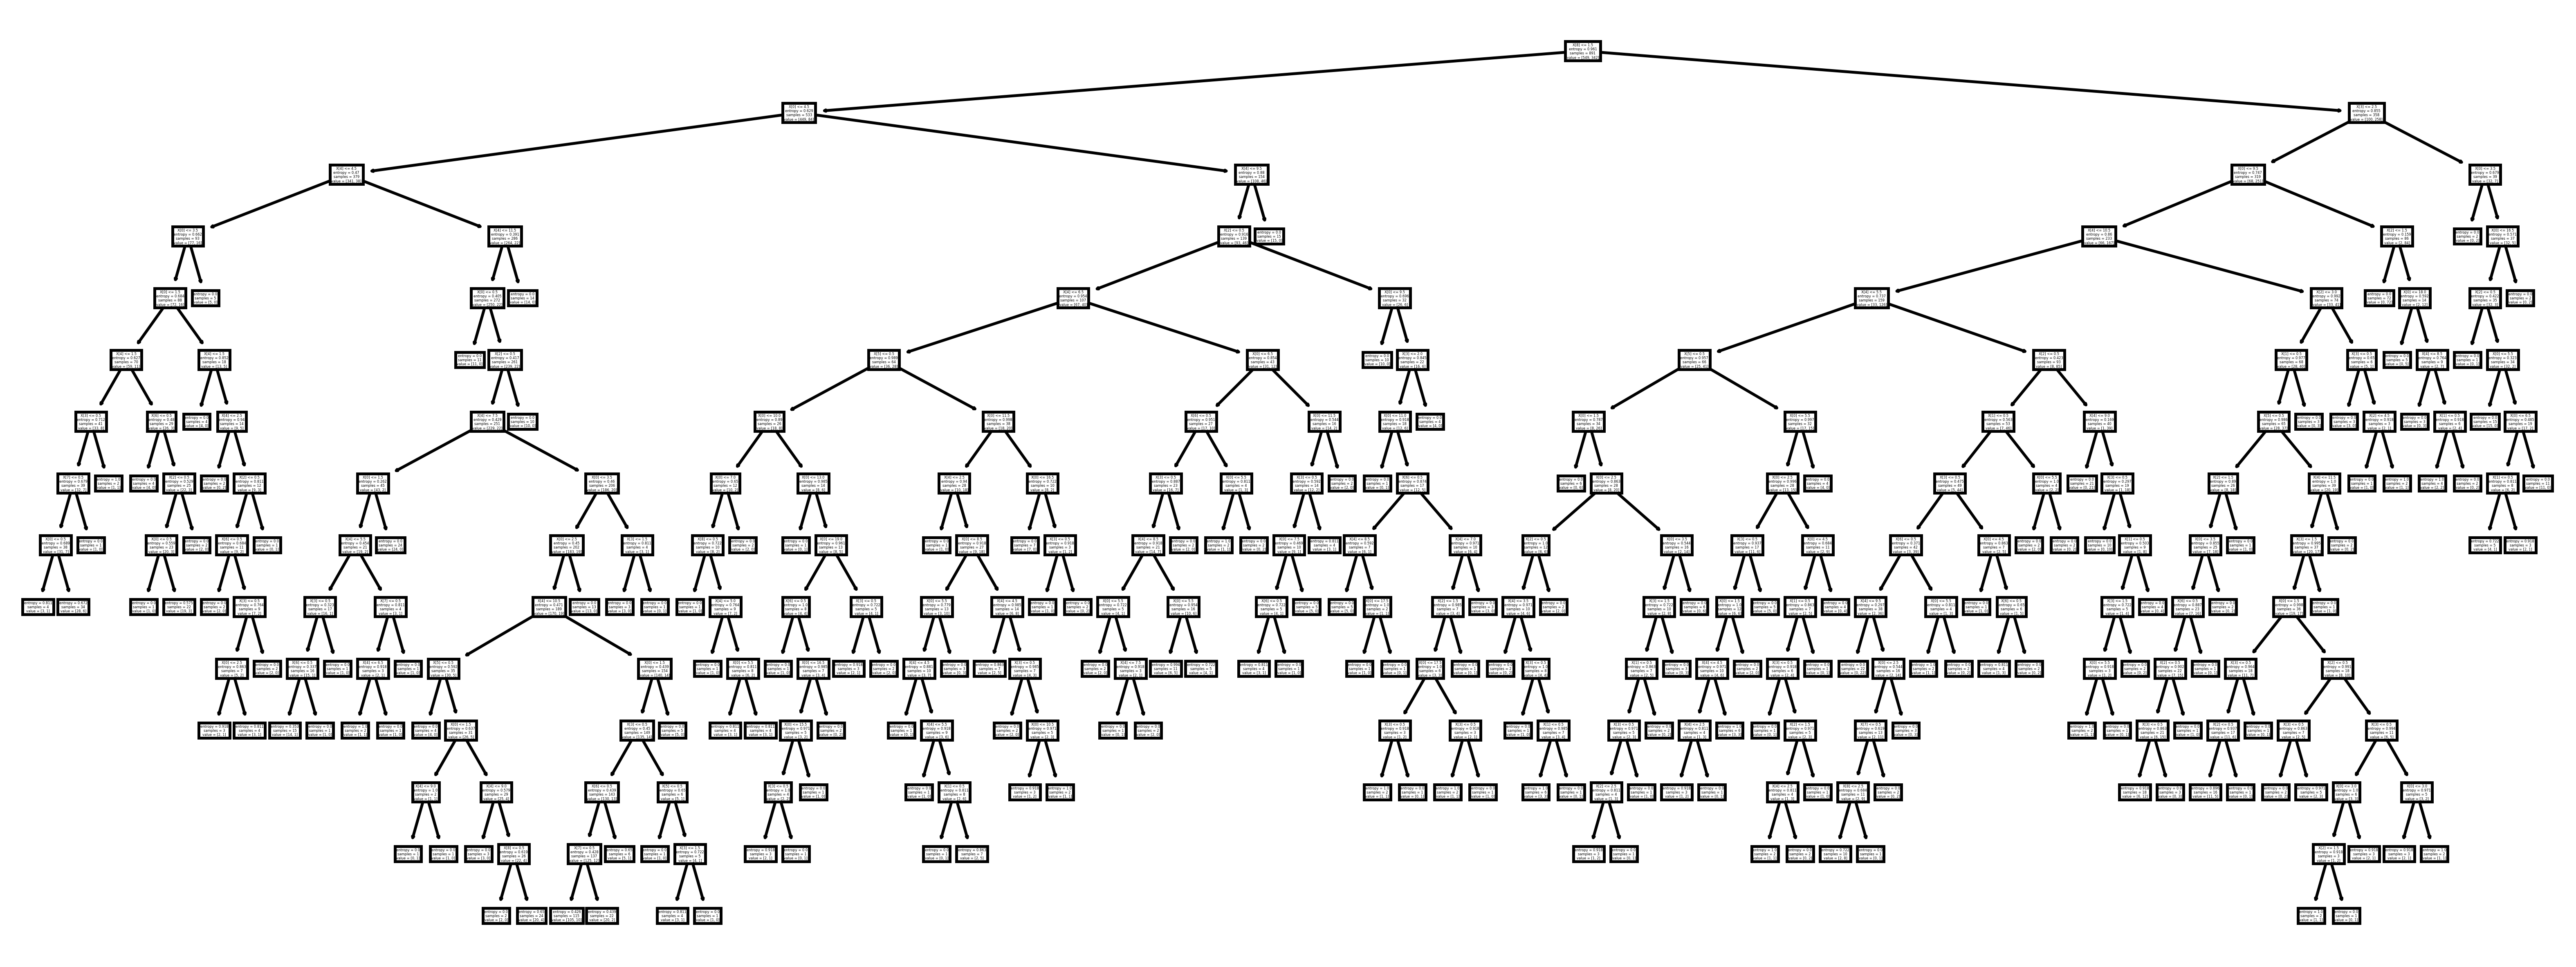

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
modelDT0 = DecisionTreeClassifier(criterion='entropy', random_state=0)
modelDT0.fit(TrainSet1X,TrainSet1Y)
print(modelDT0)

export_graphviz(modelDT0, out_file='decision_tree.dot', feature_names=TrainSet1.columns)

fig, axes = plt.subplots(figsize=(16,6), dpi=500)
plot_tree(modelDT0)
fig.savefig('decision_tree.png')

PredSet1Y_DT = modelDT0.predict(TestSet1X)
print(modelDT0.score(TestSet1X ,TestSet1Y))

Accuracy: 0.8492822966507177
Precision: 0.7870967741935484
Recall: 0.8026315789473685


Text(0.5, 257.44, 'Predicted label')

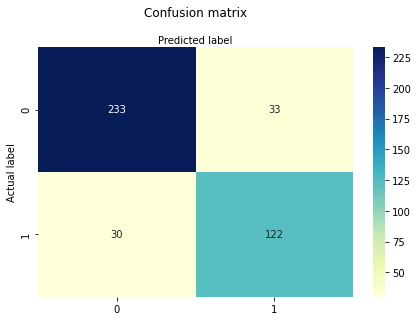

In [45]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(TestSet1Y, PredSet1Y_DT))
print("Precision:",metrics.precision_score(TestSet1Y, PredSet1Y_DT))
print("Recall:",metrics.recall_score(TestSet1Y, PredSet1Y_DT))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(TestSet1Y, PredSet1Y_DT)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### 限制max_depth=10

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
0.8755980861244019


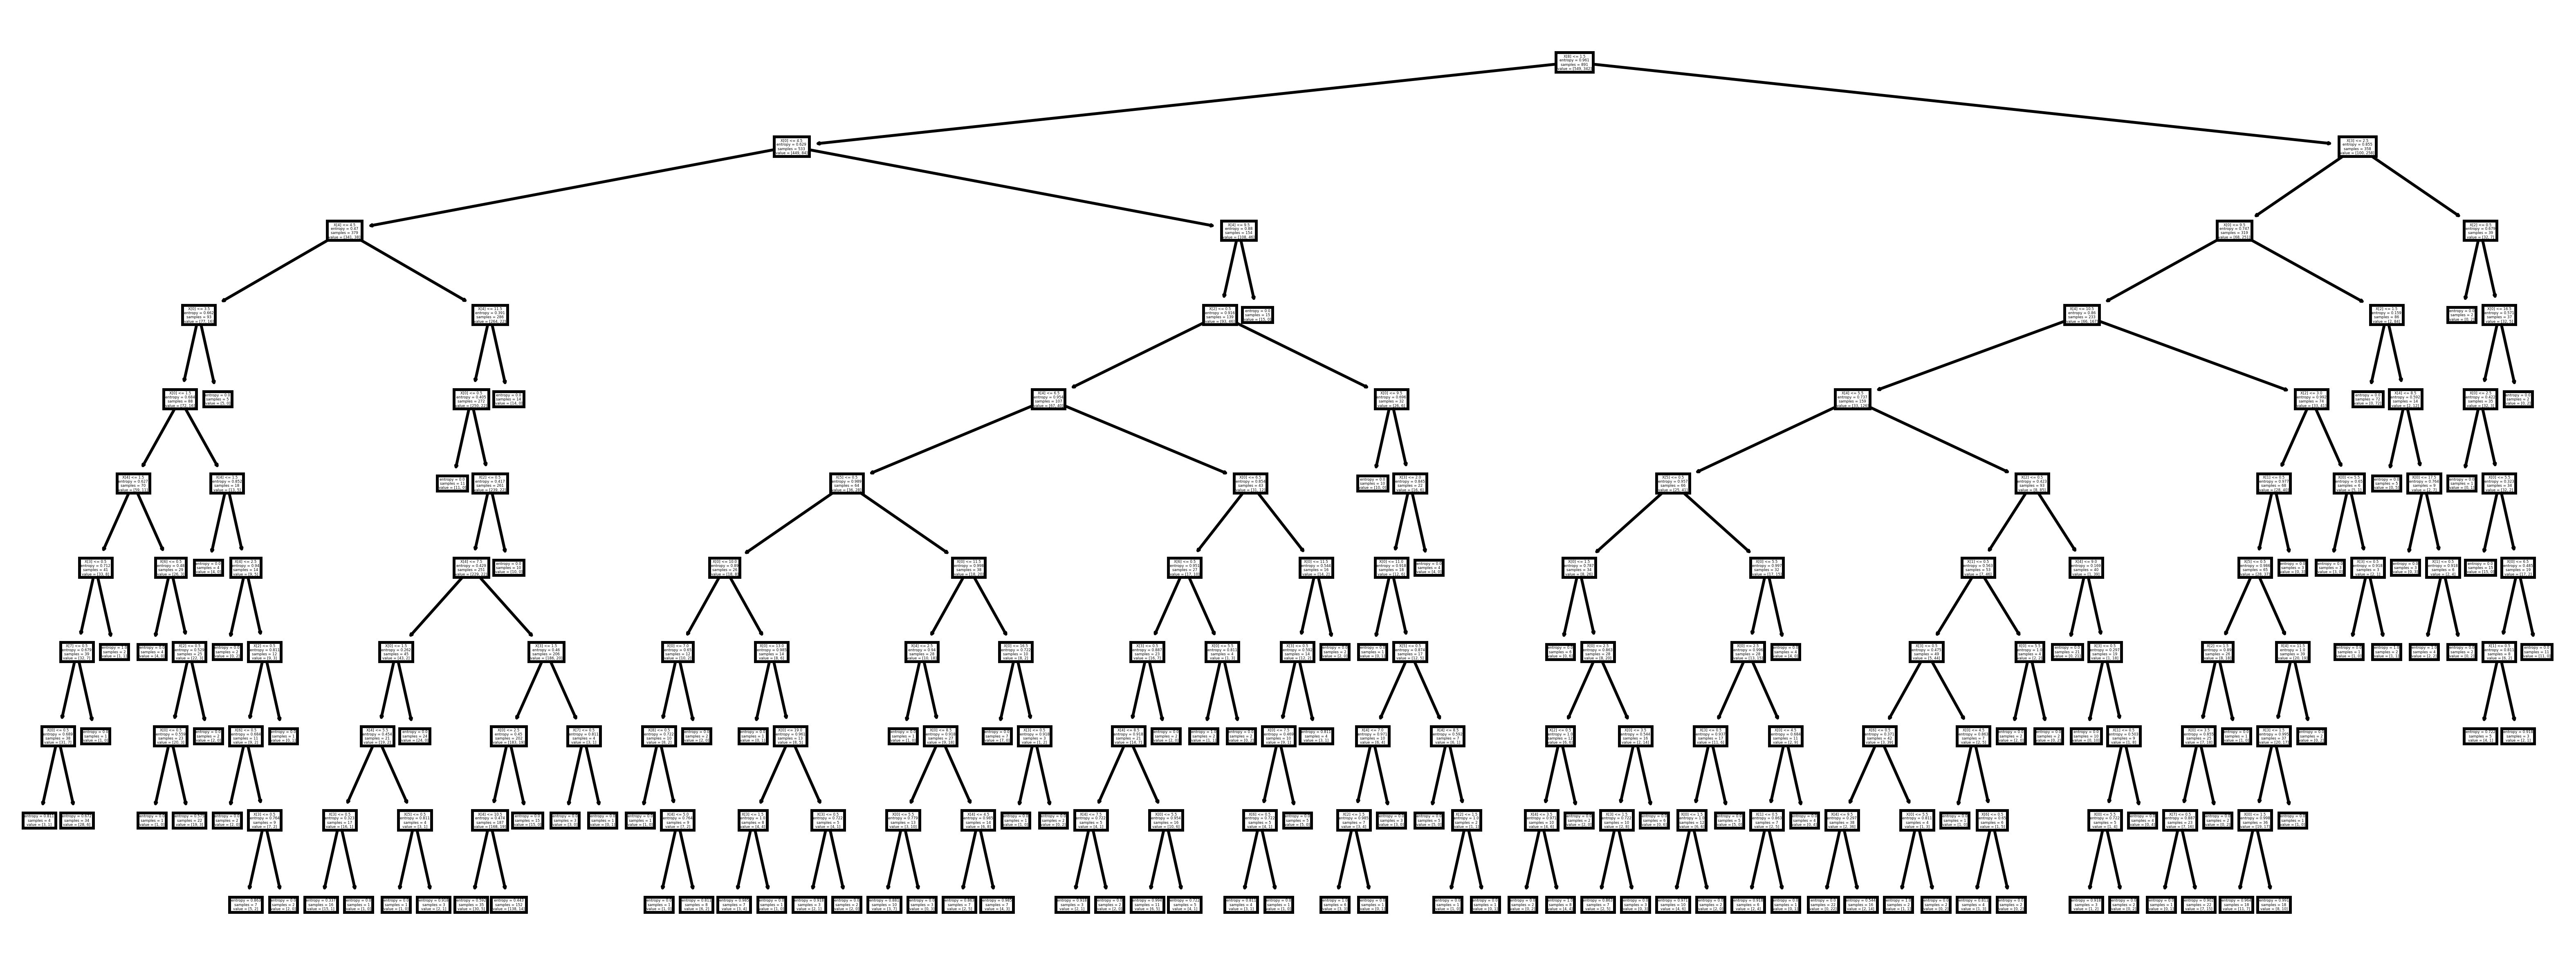

In [48]:
modelDT1 = DecisionTreeClassifier(
    criterion='entropy', random_state=0, max_depth=10
)
modelDT1.fit(TrainSet1X,TrainSet1Y)
print(modelDT1)

export_graphviz(modelDT1, out_file='decision_tree_max10.dot', feature_names=TrainSet1.columns)

fig, axes = plt.subplots(figsize=(16,6), dpi=500)
plot_tree(modelDT1)
fig.savefig('decision_tree_max10.png')

PredSet1Y_DT1 = modelDT1.predict(TestSet1X)
print(modelDT1.score(TestSet1X ,TestSet1Y))

Accuracy: 0.8755980861244019
Precision: 0.8048780487804879
Recall: 0.868421052631579


Text(0.5, 257.44, 'Predicted label')

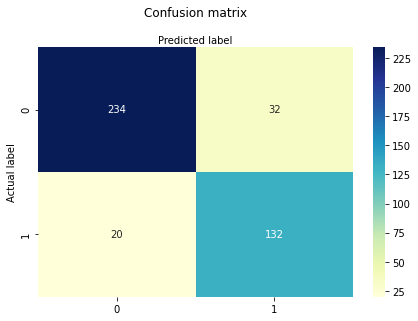

In [49]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(TestSet1Y, PredSet1Y_DT1))
print("Precision:",metrics.precision_score(TestSet1Y, PredSet1Y_DT1))
print("Recall:",metrics.recall_score(TestSet1Y, PredSet1Y_DT1))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(TestSet1Y, PredSet1Y_DT1)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.2. 隨機森林 Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
modelRF0 = RandomForestClassifier(criterion='entropy', random_state=0)
modelRF0.fit(TrainSet1X,TrainSet1Y)
print(modelRF0)

# export_graphviz(modelRF0, out_file='random_forest.dot', feature_names=TrainSet1.columns)

# fig, axes = plt.subplots(figsize=(16,6), dpi=500)
# fig.savefig('decision_tree.png')

PredSet1Y_RF0 = modelRF0.predict(TestSet1X)
print(modelRF0.score(TestSet1X ,TestSet1Y))

RandomForestClassifier(criterion='entropy', random_state=0)
0.861244019138756


Accuracy: 0.861244019138756
Precision: 0.7831325301204819
Recall: 0.8552631578947368


Text(0.5, 257.44, 'Predicted label')

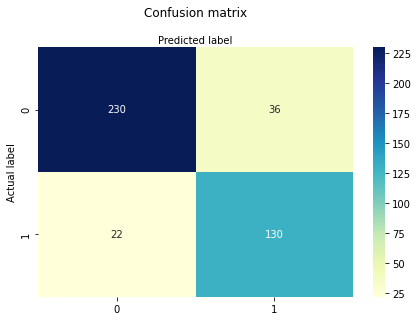

In [51]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(TestSet1Y, PredSet1Y_RF0))
print("Precision:",metrics.precision_score(TestSet1Y, PredSet1Y_RF0))
print("Recall:",metrics.recall_score(TestSet1Y, PredSet1Y_RF0))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(metrics.confusion_matrix(TestSet1Y, PredSet1Y_RF0)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 3.3. LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
modelLR0 = LogisticRegression()
modelLR0.fit(TrainSet1X,TrainSet1Y)
print(modelLR0)

PredSet1Y = modelLR0.predict(TestSet1X)
print(modelLR0.score(TestSet1X ,TestSet1Y))

LogisticRegression()
0.9258373205741627


In [40]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(TestSet1Y, PredSet1Y)
cnf_matrix

array([[240,  26],
       [  5, 147]], dtype=int64)

Accuracy: 0.9258373205741627
Precision: 0.8497109826589595
Recall: 0.9671052631578947


Text(0.5, 257.44, 'Predicted label')

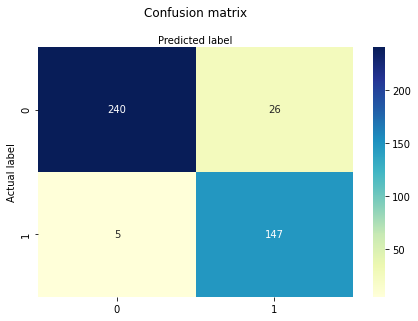

In [41]:
print("Accuracy:",metrics.accuracy_score(TestSet1Y, PredSet1Y))
print("Precision:",metrics.precision_score(TestSet1Y, PredSet1Y))
print("Recall:",metrics.recall_score(TestSet1Y, PredSet1Y))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 結論
        就我們目前所使用來自sklearn三個不同的演算法，他們都在同一筆數據下得到了相近的準確度，尤其決策樹在限制max_depth之後反而得到較高準確度，顯然是因為過擬合導致，用max_depth進行剪枝成功迴避了這個問題。